# Are Netflix Movies Decreasing in Duration Length?
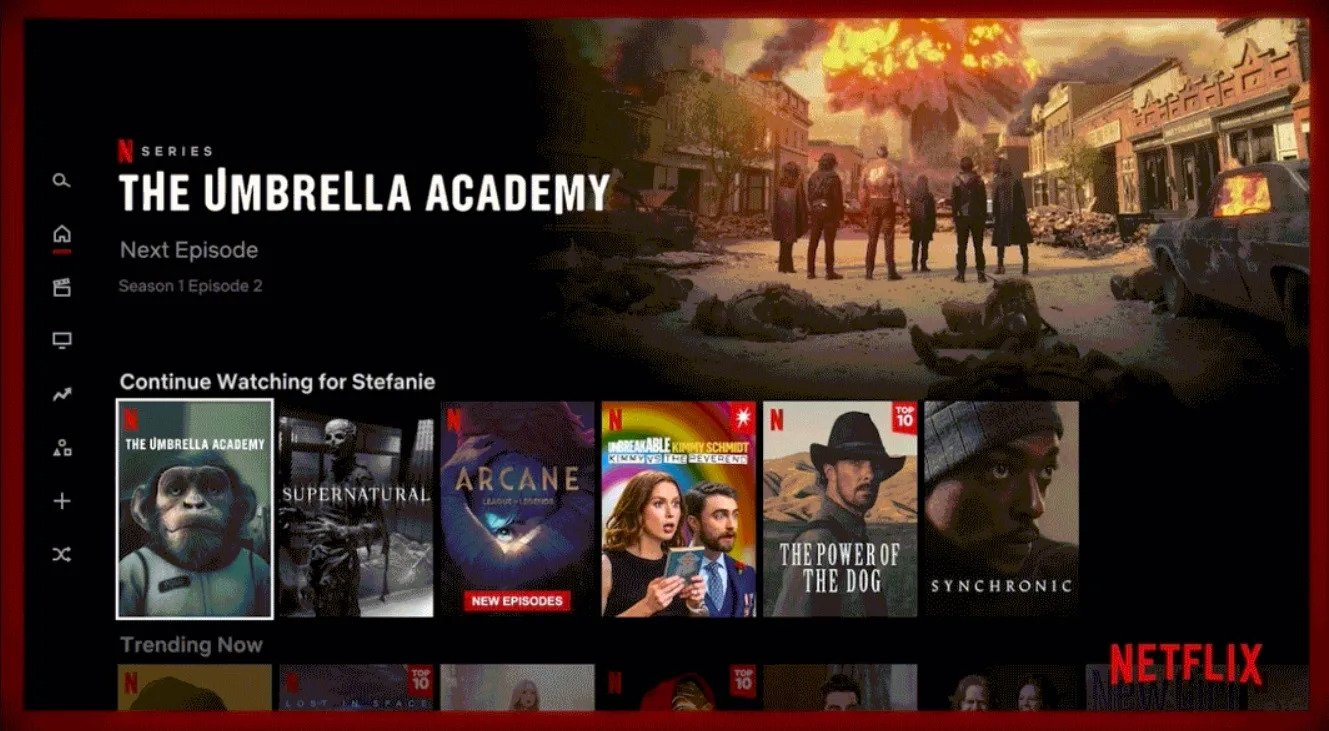

## Table of Contents:
1. [Loading the data into a Python dictionary](#one)<br>
2. [Creating a DataFrame from a dictionary](#two)<br>
3. [Visualization of Data Sample](#three)<br>
4. [What does the rest of CSV data look like?](#four)<br>
5. [We want movies so we filter!](#five)<br>
6. [Check the scatter plot](#six)<br>
7. [Lots of films lately, and many are shorter](#seven)<br>
8. [Color for non-feature films](#eight)<br>
9. [Plotting with paint buckets!](#nine)<br>
10. [Conclusion](#ten)<br>
<br>

<a id="one"></a>
## 1| Loading the data into a Python dictionary
<p>Netflix! Is! Everywhere! It came about as a DVD rental service in 1997 and has not looked back. The stock of Netflix was the <a href="https://www.cnbc.com/2019/12/23/netflix-was-the-top-stock-of-the-decade-delivering-over-4000percent-return.html">best performer</a> in the S&P 500 in the 2010s decade. Over 221 million people worldwide subscribe to Netflix at the end of  <a href="https://www.statista.com/statistics/250934/quarterly-number-of-netflix-streaming-subscribers-worldwide/">quarter one</a> in 2022.</p>
<p>So many movies and tv series call Netflix home, making it an excellent opportunity to use data manipulation skills and peek into the entertainment industry. A friend of mine has been experimenting with Python and is sharing some data from a CSV file containing Netflix information. She says the data shows movie lengths are declining.</p>
<p>She has provided me with the following lists for years and movie durations. Years range from 2011 to 2020, and the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>

In [2]:
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103,101,99,100,100,95,95,96,93,90]

# Create a dictionary with the two lists
movie_dictionary = {"years":years,"durations":durations}

# Print the dictionary
movie_dictionary

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

<a id="two"></a>
## 2| Creating a DataFrame from a dictionary
<p>To convert our dictionary <code>movie_dict</code> to a <code>pandas</code> DataFrame, we will first need to import the library. We check the DataFrame to make sure it looks right.</p>

In [3]:
# Import pandas
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dictionary)

# Print the DataFrame
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


<a id="three"></a>
## 3| Visualization of Data Sample
<p>We now have a <code>pandas</code> DataFrame! We want to follow up on my friend's assertion that movie lengths have decreased over time. Visualization of the data is what we want to do.</p>
<p>A line plot with the dates represented along the x-axis and the average length in minutes along the y-axis is excellent since the data is continuous. We can easily spot any trends in movie durations.

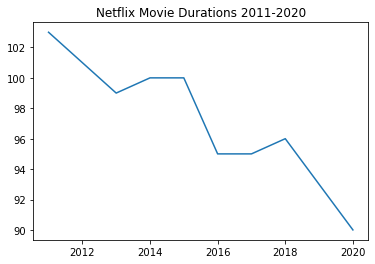

In [4]:
# Import matplotlib and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of years and durations
plt.plot(durations_df['years'],durations_df['durations'])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

<a id="four"></a>
## 4| What does the rest of the CSV data look like?
<p>My friend is right! Movie lengths have decreased over the past ten years! However, I am skeptical because I only have a few data points since it is an aggregation of all films on Netflix. Some questions about this trend that I cannot currently answer, include:</p>
<ol>
<li>What does this trend look since the 1990s?</li>
<li>How are the genres trending over time?</li>
</ol>
<p>I asked my friend for the original CSV she used to perform the analysis, and she kindly sent the file. Having access to the CSV file means I can create another DataFrame, this time with data unaggregated. I inspect it by printing only the first five rows.</p>

In [6]:
# Read the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


<a id="five"></a>
## 5| We want movies so we filter!
<p>More columns and more information! Let's start looking at the movie lengths. </p>
<p>Or can we? I notice a column <code>type</code> that has TV shows and movies in it. Furthermore, the <code>duration</code> column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?</p>
<p>Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where <code>type</code> is <code>Movie</code>. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>

In [12]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


<a id="six"></a>
## 6| Check the scatter plot
<p>We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.</p>
<p>A line plot is no longer a good choice for our data since we are no longer working with aggregates but instead with individual movies. Let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>

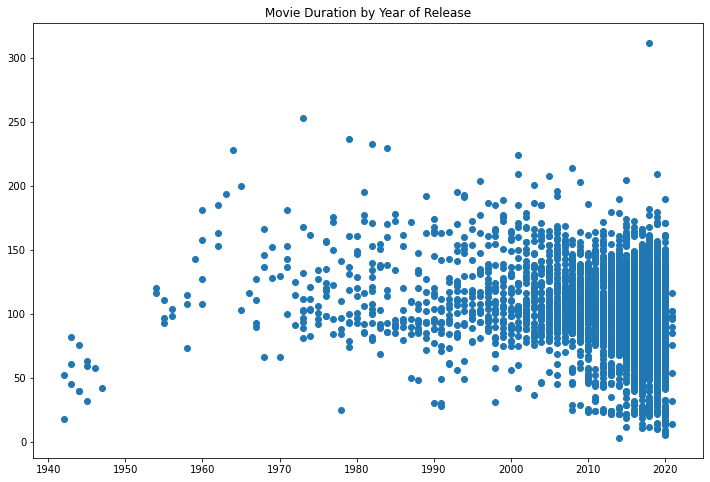

In [8]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

<a id="seven"></a>
## 7| Lots of films lately, and many are shorter
<p>Trends emerge where we couldn't see before when the data was aggregated. Newer movies are overrepresented on the Netlfix, and many short movies have been released in the past two decades.</p>
<p>Let's filter our DataFrame for movies with a <code>duration</code> under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.</p>

In [19]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 25 rows of short_movies
short_movies.head(25)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


<a id="eight"></a>
## 8| Color for non-feature films
<p>Well it looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Documentaries", and some "Stand-Up". These types of films are likely often shorter than the 90 minute plus Hollywood blockbuster.</p>
<p>We could filter these rows out from the DataFrame and plot the values again. To make it fun we can explore the effect of these genres on our data by marking them with a different color.</p>
<p>In Python has many ways to do this, but I'll use a loop to generate a list of colors based on the contents of the <code>genre</code> column. I can then pass this list to the plotting function in a later step to color all non-typical genres in a different color!</p>

In [13]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 8 values in your list        
colors[0:8]

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']

<a id="nine"></a>
## 9| Plotting with paint buckets!
<p>Alright! We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>
<p>We'll also spruce up our plot with axis labels and a new theme with <code>plt.style.use()</code>.

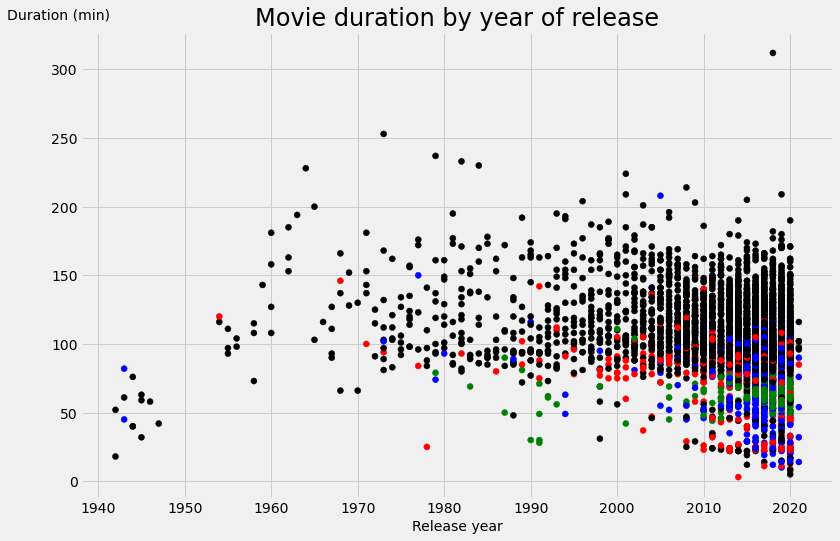

In [18]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release",fontsize=24)
plt.xlabel("Release year",fontsize=14)
plt.ylabel("Duration (min)", labelpad=-7.5, position=(2.5,1.02), rotation='horizontal',fontsize=14)

# Show the plot
plt.show()

<a id="ten"></a>
## 10| Conclusion: Are the movies on Netflix getting shorter?
<p>No, there has been more movies of the documentary, stand-up, and children genres released in the last years. More analysis is needed to determine if the mean movie duration is decreasing. <p>